![Astrofisica Computacional](../../logo.png)

# Exercises W01-A

**Name:** 

---

## 1. Dependencia de la Dispersión de velocidades con la línea [O III] $\lambda$ 5007

Este ejercicio esta basado en los desarrollos del paper

T. A. Boroson. *Does the Narrow [O III] λ5007 Line Reflect the Stellar Velocity Dispersion in AGN?*. [Astrophys.J. 585 (2003) 647-652](https://ui.adsabs.harvard.edu/abs/2003ApJ...585..647B/abstract)

- Ingrese a la página 

[https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=J/ApJ/585/647](https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=J/ApJ/585/647)

y descargue el archivo de datos, preferiblemente en el formato de `table1.dat` junto con el archivo `ReadMe` correspondiente.

- Lea el archivo e identifique las cantidades físicas reportadas en la tabla de datos. Cuantos objetos están catalogados en este archivo?

- Realice una gráfica del logaritmo de la masa del agujero negro en masas solares, $\log M$, contra el logaritmo de la dispersión de velocidades obtenido a partir de la línea [O III] $\lambda$ 5007, $\log \sigma_{[O III]}$. Utilice los siguientes marcadores para la figura, dependiendo del logaritmo de la razón de densidad de flujo entre 5 Ghz y 2500 Angstrom, $\log R $, : Para objetos radio-ruidosos ($\log R > 1$ ) utilice circulos, para objetos no observados en radio ($\log R $ : 'not observed') utilice trangulos y para el resto de objetos (radio-silenciosos) utilice cuadrados. De esta forma se reproducirá La Figura 1 del artículo. 





In [1]:
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


data1 = ascii.read('J_ApJ_585_647/table1.dat', readme='J_ApJ_585_647/ReadMe')
data1

---,SDSS,z,FWHM,sigma,logM,logR,f_logR
,,,km / s,km / s,dex(Msun),dex(---),
str4,str19,float64,int64,int64,float64,float64,str2
SDSS,J000011.97+000225.1,0.479,2290,290,8.17,--,nd
SDSS,J000710.02+005329.0,0.3164,11158,271,9.56,0.27,--
SDSS,J001327.31+005232.0,0.3626,1549,183,7.71,--,nd
SDSS,J001903.17+000659.1,0.0726,3283,90,8.1,--,nd
SDSS,J002444.11+003221.4,0.4004,9159,180,9.56,1.42,:
SDSS,J003238.20-010035.3,0.0919,1919,73,7.1,--,nd
SDSS,J003431.74-001312.7,0.3811,1197,223,7.39,--,nd
SDSS,J003723.50+000812.6,0.2518,2598,196,7.85,--,nd


In [2]:
# Define the marker and its colors according to the logR column
# and taking into account the flags in f_logR
m = []
fc = []
for d in data1:
    if d['f_logR']=='no':
        m.append('^')
        fc.append('black')
    else:
        if d['logR']>1:
            m.append('o')
            fc.append('none')
        else:
            m.append('s')
            fc.append('black')


data1.add_column(m, name='markers')
data1.add_column(fc, name='facecolors')
data1

---,SDSS,z,FWHM,sigma,logM,logR,f_logR,markers,facecolors
,,,km / s,km / s,dex(Msun),dex(---),,,
str4,str19,float64,int64,int64,float64,float64,str2,str1,str5
SDSS,J000011.97+000225.1,0.479,2290,290,8.17,--,nd,s,black
SDSS,J000710.02+005329.0,0.3164,11158,271,9.56,0.27,--,s,black
SDSS,J001327.31+005232.0,0.3626,1549,183,7.71,--,nd,s,black
SDSS,J001903.17+000659.1,0.0726,3283,90,8.1,--,nd,s,black
SDSS,J002444.11+003221.4,0.4004,9159,180,9.56,1.42,:,o,none
SDSS,J003238.20-010035.3,0.0919,1919,73,7.1,--,nd,s,black
SDSS,J003431.74-001312.7,0.3811,1197,223,7.39,--,nd,s,black
SDSS,J003723.50+000812.6,0.2518,2598,196,7.85,--,nd,s,black


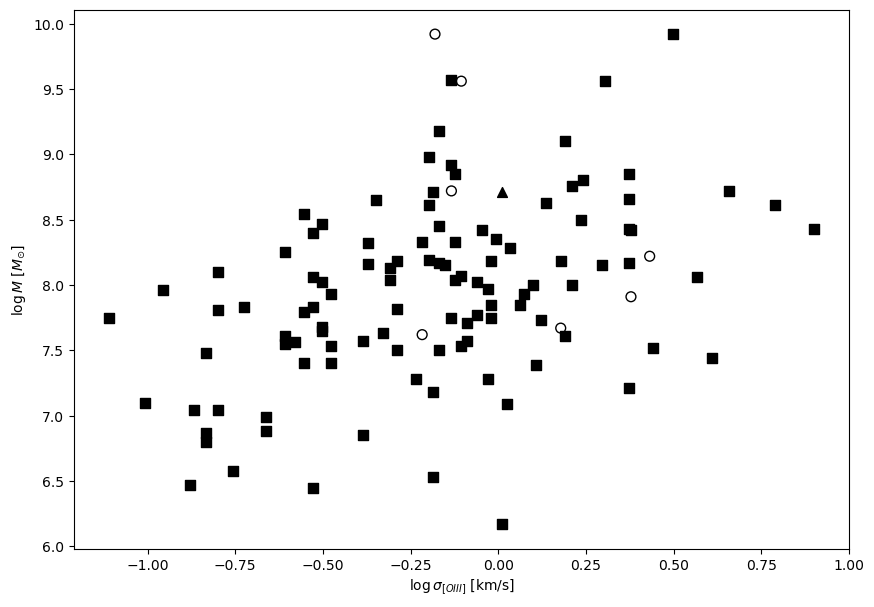

In [3]:
plt.figure(figsize=(10,7))
for d in data1:
    plt.scatter(np.log(d['sigma']/200), d['logM'],
                 marker=d['markers'], s=50,
                facecolors=d['facecolors'],
                edgecolors='black'
               )
plt.xlabel(r'$\log \sigma_{[OIII]}$ [km/s]')
plt.ylabel(r'$\log M$ [$M_{\odot}$]')
plt.show()

## 2. AGNs

Este ejercicio esta basado en los desarrollos del paper

J. R. Trump et. al. *Accretion Rate and the Physical Nature of Unobscured Active Galaxies*. [ApJ 733 60 (2011)](https://ui.adsabs.harvard.edu/abs/2011ApJ...733...60T/abstract)

- Ingrese a la página 

[https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=J/ApJ/733/60](https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=J/ApJ/733/60)

y descargue el archivo de datos, preferiblemente en el formato de `table2.dat` junto con el archivo `ReadMe` correspondiente.

- Lea el archivo e identifique las cantidades físicas reportadas en la tabla de datos. Cuantos objetos están catalogados en este archivo?

- Realice una gráfica del logaritmo de la luminosidad de acreción, $\log L$, contra el logaritmo de la masa del agujero negro en masas solares, $\log M$, e incluyendo las líneas de error respectivas. Utilice los siguientes marcadores para la figura, dependiendo del tipo de objeto presentado en la columna 'Type': Para AGNs de líneas anchas (Broad-line) utilice cruces negras, para AGNs de líneas delgadas (Narrow-line) utilice diamantes azules y para AGNs sin lineas (lineless) utilice cuadrados rojos.  





In [4]:
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


data2 = ascii.read('J_ApJ_733_60/table2.dat', readme='J_ApJ_733_60/ReadMe')
data2

RAh,RAm,RAs,DE-,DEd,DEm,DEs,Type,z,r_z,logL,e_logL,E_logL,logM,e_logM,E_logM,logAcc,e_logAcc,E_logAcc
h,min,s,,deg,arcmin,arcsec,,,,[10-7W],[10-7W],[10-7W],dex(Msun),dex(Msun),dex(Msun),dex(---),dex(---),dex(---)
int64,int64,float64,str1,int64,int64,float64,str2,float64,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64
9,57,28.34,+,2,25,42.2,BL,1.54,S,46.03,0.1,0.52,8.4,0.43,0.36,-0.49,0.27,0.58
9,57,40.78,+,2,2,7.9,BL,1.48,I,45.88,0.3,0.64,8.24,0.39,0.45,-0.47,0.4,0.68
9,57,43.33,+,2,48,23.8,BL,1.36,S,45.84,0.16,0.66,8.24,0.36,0.44,-0.51,0.66,0.18
9,57,49.02,+,1,53,10.1,NL,0.32,I,43.89,0.21,0.71,8.61,0.3,0.29,-2.84,0.15,0.73
9,57,50.2,+,2,25,48.3,BL,1.24,Z,44.93,0.2,0.52,7.28,0.41,0.38,-0.46,0.28,0.6
9,57,52.17,+,1,51,20.1,BL,4.16,Z,46.28,0.1,0.69,8.71,0.42,0.41,-0.54,0.36,0.53
9,57,52.17,+,1,51,20.1,BL,4.17,I,46.26,0.07,0.54,8.66,0.44,0.38,-0.51,0.31,0.52
9,57,53.49,+,2,47,36.1,BL,3.61,I,46.24,0.27,0.75,8.0,0.4,0.49,0.12,0.46,0.69


In [5]:
# Define the markers and colors for the plot accoring 
# to the 'Type' column

markers = {'BL':'k+',
            'NL':'bD',
            'OD':'rs'}
m = []
for d in data2:
    m.append(markers[d['Type']])

data2.add_column(m, name='markers')
data2

RAh,RAm,RAs,DE-,DEd,DEm,DEs,Type,z,r_z,logL,e_logL,E_logL,logM,e_logM,E_logM,logAcc,e_logAcc,E_logAcc,markers
h,min,s,,deg,arcmin,arcsec,,,,[10-7W],[10-7W],[10-7W],dex(Msun),dex(Msun),dex(Msun),dex(---),dex(---),dex(---),
int64,int64,float64,str1,int64,int64,float64,str2,float64,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2
9,57,28.34,+,2,25,42.2,BL,1.54,S,46.03,0.1,0.52,8.4,0.43,0.36,-0.49,0.27,0.58,k+
9,57,40.78,+,2,2,7.9,BL,1.48,I,45.88,0.3,0.64,8.24,0.39,0.45,-0.47,0.4,0.68,k+
9,57,43.33,+,2,48,23.8,BL,1.36,S,45.84,0.16,0.66,8.24,0.36,0.44,-0.51,0.66,0.18,k+
9,57,49.02,+,1,53,10.1,NL,0.32,I,43.89,0.21,0.71,8.61,0.3,0.29,-2.84,0.15,0.73,bD
9,57,50.2,+,2,25,48.3,BL,1.24,Z,44.93,0.2,0.52,7.28,0.41,0.38,-0.46,0.28,0.6,k+
9,57,52.17,+,1,51,20.1,BL,4.16,Z,46.28,0.1,0.69,8.71,0.42,0.41,-0.54,0.36,0.53,k+
9,57,52.17,+,1,51,20.1,BL,4.17,I,46.26,0.07,0.54,8.66,0.44,0.38,-0.51,0.31,0.52,k+
9,57,53.49,+,2,47,36.1,BL,3.61,I,46.24,0.27,0.75,8.0,0.4,0.49,0.12,0.46,0.69,k+


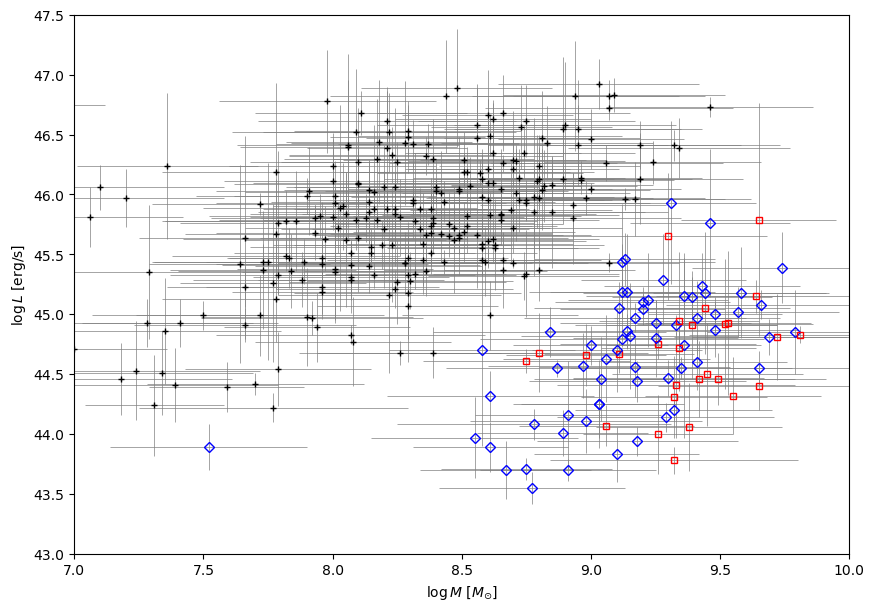

In [6]:
plt.figure(figsize=(10,7))
for d in data2:
    plt.errorbar(d['logM'], d['logL'], 
                 d['e_logL'], d['e_logM'], 
                 fmt=d['markers'], markersize=5,
                 markerfacecolor='none',
                 markeredgewidth=1,
                 ecolor='gray', elinewidth=0.5)

plt.xlabel(r'$\log M$ [$M_{\odot}$]')
plt.ylabel(r'$\log L$ [erg/s]')
plt.xlim(7,10)
plt.ylim(43,47.5)
plt.show()

## 3. Datos de AGNs en el SDSS

Este ejercicio esta basado en los desarrollos del paper

H. V. Abrahamyan et. al. *Classification by Activity Type of a Sample of Active Galaxies with Radio Emission*. [Astrophysics, Volume 63, Issue 3, p.322-333 (2020)](https://ui.adsabs.harvard.edu/abs/2020Ap.....63..322A/abstract)

- Ingrese a la página 

[https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=J/other/Ap/63.322](https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=J/other/Ap/63.322)

y descargue el archivo de datos, preferiblemente en el formato de `table.dat` junto con el archivo `ReadMe` correspondiente.

- Lea el archivo e identifique las cantidades físicas reportadas en la tabla de datos. Cuantos objetos están catalogados en este archivo?

- Realice una gráfica de magnitud en la banda u contra la magnitud en la banda r, en donde el color de cada objeto depende del redshift respectivo. 

- Realice una gráfica de magnitud en la banda g contra la magnitud en la banda z, en donde el color de cada objeto depende de la clasificación (old) de objeto. 





In [7]:
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


data3 = ascii.read('J_other_Ap_63.322/table3.dat', readme='J_other_Ap_63.322/ReadMe')
data3

RAdeg,DEdeg,umag,gmag,rmag,imag,zmag,z,ATold,ATnew
deg,deg,mag,mag,mag,mag,mag,,,
float64,float64,float64,float64,float64,float64,float64,float64,str9,str11
7.139167,0.919444,19.53,17.88,17.21,16.81,16.66,0.10429,Sy2,Sy2.0/LINER
15.52375,14.723611,20.13,18.33,17.17,16.65,16.3,0.18817,Sy2,Sy2.0/LINER
25.579167,13.462778,18.58,18.25,17.87,17.78,17.34,0.26685,Sy1,Sy1.5
27.067917,0.329167,18.49,16.91,16.01,15.53,15.21,0.092,Sy1,Sy1.9/LINER
117.150833,24.006667,19.79,19.19,18.56,18.15,18.15,0.40972,BZQ,Em
118.184167,45.949444,17.15,15.37,14.43,13.95,13.61,0.05145,Sy1.9,Sy1.9/LINER
121.395833,24.164167,18.12,16.23,15.37,14.88,14.56,0.05968,Sy2,LINER
123.349167,7.568056,18.75,16.76,15.74,15.2,14.86,0.11239,Sy1,LINER


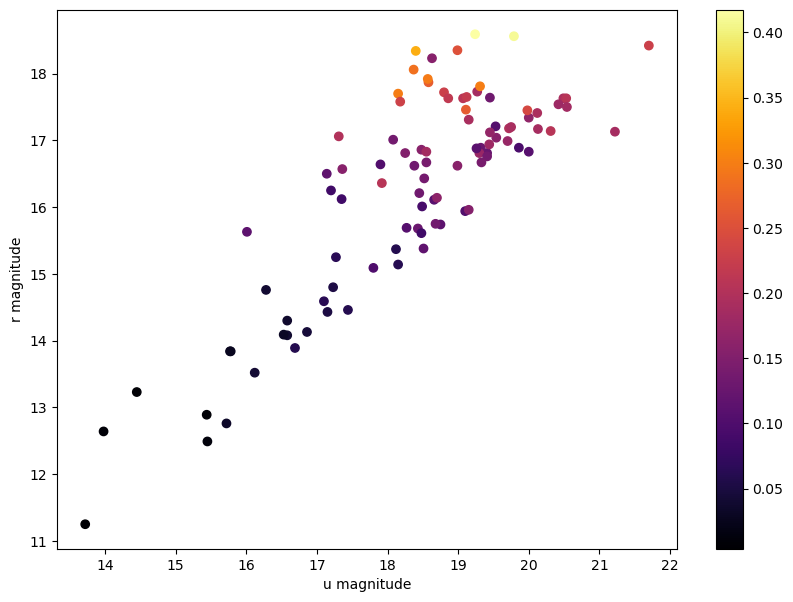

In [8]:
plt.figure(figsize=(10,7))
plt.scatter(data3['umag'], data3['rmag'], 
                 c=data3['z'],cmap='inferno')
plt.xlabel(r'u magnitude')
plt.ylabel(r'r magnitude')
plt.colorbar()
plt.show()

In [9]:
# Identify the unique labels in the 'ATold' column

ATold = np.unique(data3['ATold'])
ATold

-
AGN
BZQ
HII
LINER
LINER/BZB
LINER/BZG
Sy
Sy1
Sy1.5
Sy1.8


In [10]:
import matplotlib.patches as mpatches
import matplotlib as mpl

# Define the colormap discrete colors according 
# to the number of unique labels in ATold and
# create the legend handles for the plot

legend = []
colorChart = []
cmap = plt.cm.jet
for i in range(len(ATold)):
    n = i*255//len(ATold)
    legend.append(mpatches.Patch(color=cmap(n), label=ATold[i]))
    colorChart.append(cmap(n))

# Create a new column with the colors assigned 
# to each label

colors = []
for d in data3:
    for i in range(len(ATold)):
        if d['ATold']==ATold[i]:
            colors.append(colorChart[i])

data3.add_column(colors, name='colors')
data3

RAdeg,DEdeg,umag,gmag,rmag,imag,zmag,z,ATold,ATnew,colors
deg,deg,mag,mag,mag,mag,mag,,,,
float64,float64,float64,float64,float64,float64,float64,float64,str9,str11,float64[4]
7.139167,0.919444,19.53,17.88,17.21,16.81,16.66,0.10429,Sy2,Sy2.0/LINER,1.0 .. 1.0
15.52375,14.723611,20.13,18.33,17.17,16.65,16.3,0.18817,Sy2,Sy2.0/LINER,1.0 .. 1.0
25.579167,13.462778,18.58,18.25,17.87,17.78,17.34,0.26685,Sy1,Sy1.5,0.16129032258064513 .. 1.0
27.067917,0.329167,18.49,16.91,16.01,15.53,15.21,0.092,Sy1,Sy1.9/LINER,0.16129032258064513 .. 1.0
117.150833,24.006667,19.79,19.19,18.56,18.15,18.15,0.40972,BZQ,Em,0.0 .. 1.0
118.184167,45.949444,17.15,15.37,14.43,13.95,13.61,0.05145,Sy1.9,Sy1.9/LINER,0.641998734977862 .. 1.0
121.395833,24.164167,18.12,16.23,15.37,14.88,14.56,0.05968,Sy2,LINER,1.0 .. 1.0
123.349167,7.568056,18.75,16.76,15.74,15.2,14.86,0.11239,Sy1,LINER,0.16129032258064513 .. 1.0


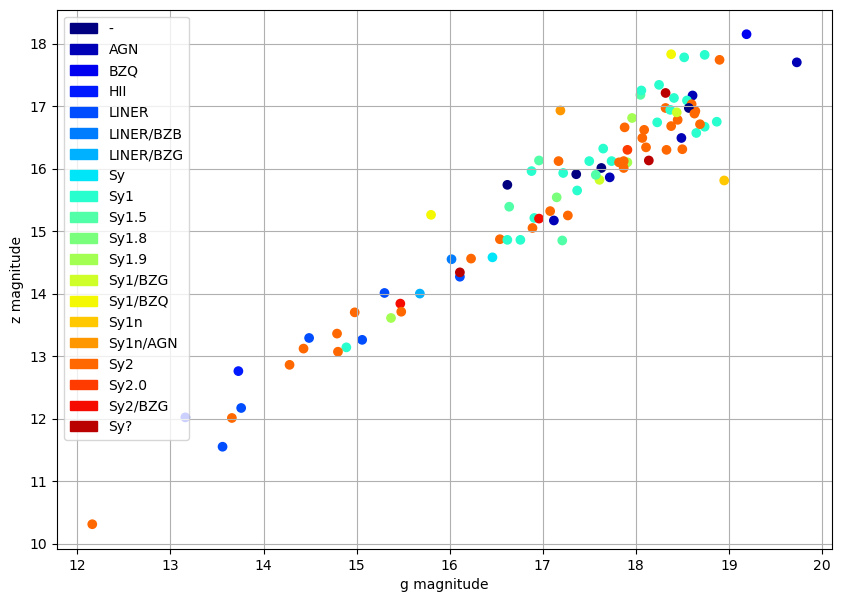

In [11]:
plt.figure(figsize=(10,7))
plt.scatter(data3['gmag'], data3['zmag'], 
                 c=data3['colors'],cmap=cmap)
plt.xlabel(r'g magnitude')
plt.ylabel(r'z magnitude')
plt.legend(handles=legend)
plt.grid()
plt.show()